Importing the Dataset

In [1]:
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
from google.colab import auth

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

fid=drive.ListFile({'q':"title='mango_leaf_disease.zip'"}).GetList()[0]['id']
f=drive.CreateFile({'id':fid})
f.GetContentFile('mango_leaf_disease.zip')

!unzip 'mango_leaf_disease.zip'

Archive:  mango_leaf_disease.zip
   creating: test/Anthracnose/
  inflating: test/Anthracnose/IMG_20211011_164630 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164644 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164646 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164659 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164702 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164706 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164708 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164850 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164852 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164854 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164858 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164901 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164906 (Custom).jpg  
  inflating: test/Anthracnose/IMG_20211011_164910 (Custom).jpg  
  inflating: test/Anthracn

Image Preprocessing and Implementation of Training and Validation Sets



> Importing Libraries



In [2]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd



> Augmentation Parameter Setup



In [3]:
height=299
width=299
batch_size=32
epochs=100

rs=1./255
rr=5
zr=0.1
sr=0.1
hsr=0.1
wsr=0.1
hf=True
vf=False
s=False

X_train_length=len(os.listdir('./train/Anthracnose/'))+len(os.listdir('./train/Bacterial Canker/'))+len(os.listdir('./train/Cutting Weevil'))+len(os.listdir('./train/Die Back'))+len(os.listdir('./train/Gall Midge'))+len(os.listdir('./train/Healthy'))+len(os.listdir('./train/Powdery Mildew'))+len(os.listdir('./train/Sooty Mould'))
X_test_length=len(os.listdir('./test/Anthracnose'))+len(os.listdir('./test/Bacterial Canker'))+len(os.listdir('./test/Cutting Weevil'))+len(os.listdir('./test/Die Back'))+len(os.listdir('./test/Gall Midge'))+len(os.listdir('./test/Healthy'))+len(os.listdir('./test/Powdery Mildew'))+len(os.listdir('./test/Sooty Mould'))

training_steps=X_train_length//batch_size
test_steps=X_test_length//batch_size



> Creating Training set and Test set with Image Preprocessing



In [4]:
train_augmentation=ImageDataGenerator(rescale=rs,rotation_range=rr,zoom_range=zr,shear_range=sr,height_shift_range=hsr,width_shift_range=wsr,horizontal_flip=hf,vertical_flip=vf)
test_augmentation=ImageDataGenerator(rescale=rs)

X_train_images=train_augmentation.flow_from_directory('./train/',target_size=(height,width),batch_size=batch_size,class_mode='categorical',shuffle=s)
X_test_images=test_augmentation.flow_from_directory('./test/',target_size=(height,width),batch_size=batch_size,class_mode='categorical',shuffle=s)

X_train=np.concatenate([X_train_images.next()[0] for i in range(X_train_images.__len__())])
X_test=np.concatenate([X_test_images.next()[0] for i in range(X_test_images.__len__())])

Found 3600 images belonging to 8 classes.
Found 400 images belonging to 8 classes.




> Labling



In [5]:
import numpy as np
y_train_labels=[]
y_test_labels=[]

for i in range(0,len(os.listdir('./train/Anthracnose'))):
    y_train_labels.append('Anthracnose')
for j in range(0,len(os.listdir('./train/Bacterial Canker'))):
    y_train_labels.append('Bacterial Canker')
for k in range(0,len(os.listdir('./train/Cutting Weevil'))):
    y_train_labels.append('Cutting Weevil')
for l in range(0,len(os.listdir('./train/Die Back'))):
    y_train_labels.append('Die Back')
for m in range(0,len(os.listdir('./train/Gall Midge'))):
    y_train_labels.append('Gall Midge')
for n in range(0,len(os.listdir('./train/Powdery Mildew'))):
    y_train_labels.append('Powdery Mildew')
for o in range(0,len(os.listdir('./train/Healthy'))):
    y_train_labels.append('Healthy')
for p in range(0,len(os.listdir('./train/Sooty Mould'))):
    y_train_labels.append('Sooty Mould')

for i in range(0,len(os.listdir('./test/Anthracnose'))):
    y_test_labels.append('Anthracnose')
for j in range(0,len(os.listdir('./test/Bacterial Canker'))):
    y_test_labels.append('Bacterial Canker')
for k in range(0,len(os.listdir('./test/Cutting Weevil'))):
    y_test_labels.append('Cutting Weevil')
for l in range(0,len(os.listdir('./test/Die Back'))):
    y_test_labels.append('Die Back')
for m in range(0,len(os.listdir('./test/Gall Midge'))):
    y_test_labels.append('Gall Midge')
for n in range(0,len(os.listdir('./test/Powdery Mildew'))):
    y_test_labels.append('Powdery Mildew')
for o in range(0,len(os.listdir('./test/Healthy'))):
    y_test_labels.append('Healthy')
for p in range(0,len(os.listdir('./test/Sooty Mould'))):
    y_test_labels.append('Sooty Mould')

y_train_raw=np.array( y_train_labels)
y_test_raw=np.array(y_test_labels)



> Shuffling the Data



In [6]:
from sklearn.utils import shuffle
X_train, y_train_raw = shuffle(X_train, y_train_raw, random_state=0)
X_test, y_test_raw = shuffle(X_test, y_test_raw, random_state=0)



> Encoding the Labels



In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train_raw)
y_test = pd.get_dummies(y_test_raw)

In [16]:
y_train.shape

(3600, 8)

Creating the CNN



> Importing Libraries



In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,GlobalAveragePooling2D
from keras.models import Model



> Getting the Pre-Trained Model



In [18]:
import tensorflow
tensorflow.keras.applications.xception.preprocess_input
pre_trained_model=tensorflow.keras.applications.Xception(input_shape=(height,width,3),include_top=False,weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable=False

83683744/83683744 [==============================] - 0s 0us/step




> Transfer Learning



In [19]:
model = pre_trained_model.output
model = GlobalAveragePooling2D()(model)
model = keras.layers.Dropout(rate=0.7000000000000001)(model)
model = keras.layers.Dense(units=408,activation='elu',kernel_initializer='he_normal')(model)
model = keras.layers.Dropout(rate=0.45000000000000007)(model)
model = keras.layers.Dense(units=472,activation='relu',kernel_initializer='random_normal')(model)
model = keras.layers.Dropout(rate=0.25)(model)
model = keras.layers.Dense(units=576,activation='relu',kernel_initializer='he_normal')(model)
prediction = keras.layers.Dense(8,activation='softmax')(model)
mango_leaf_disease_detector= Model(pre_trained_model.input, prediction)
mango_leaf_disease_detector.compile(optimizer=keras.optimizers.Adam(0.001),
                                          loss='categorical_crossentropy',
                                          metrics=['accuracy'])

In [20]:
mango_leaf_disease_detector.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             



> Plotting the Model



In [21]:
model_name='xception.png'
keras.utils.plot_model(mango_leaf_disease_detector, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

Output hidden; open in https://colab.research.google.com to view.

Training and Validation

In [22]:
mango_leaf_disease_detector.fit(X_train,y_train,epochs=epochs,validation_split=0.2)

Epoch 1/100
90/90 [==============================] - 46s 370ms/step - loss: 0.7772 - accuracy: 0.7222 - val_loss: 0.1482 - val_accuracy: 0.9486
Epoch 2/100
90/90 [==============================] - 32s 352ms/step - loss: 0.3393 - accuracy: 0.8813 - val_loss: 0.1119 - val_accuracy: 0.9583
Epoch 3/100
90/90 [==============================] - 33s 365ms/step - loss: 0.2516 - accuracy: 0.9115 - val_loss: 0.1038 - val_accuracy: 0.9667
Epoch 4/100
90/90 [==============================] - 34s 374ms/step - loss: 0.2346 - accuracy: 0.9212 - val_loss: 0.1339 - val_accuracy: 0.9500
Epoch 5/100
90/90 [==============================] - 28s 313ms/step - loss: 0.2041 - accuracy: 0.9302 - val_loss: 0.0958 - val_accuracy: 0.9694
Epoch 6/100
90/90 [==============================] - 29s 319ms/step - loss: 0.1811 - accuracy: 0.9420 - val_loss: 0.1347 - val_accuracy: 0.9528
Epoch 7/100
90/90 [==============================] - 33s 370ms/step - loss: 0.1869 - accuracy: 0.9365 - val_loss: 0.0721 - val_accuracy:

In [23]:
cnn=mango_leaf_disease_detector



> Graphical Results for Training and Validation



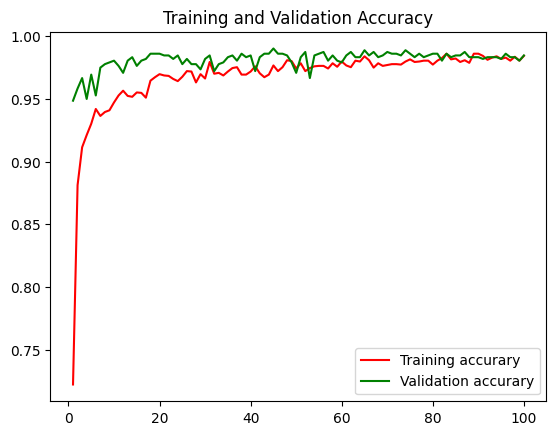

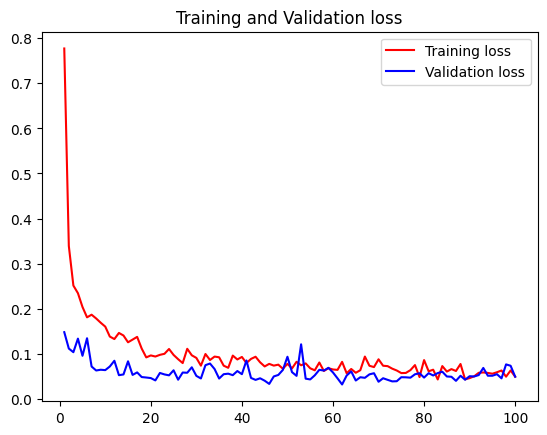

In [24]:
acc=cnn.history.history['accuracy']
val_acc=cnn.history.history['val_accuracy']
loss=cnn.history.history['loss']
val_loss=cnn.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Testing

In [25]:
y_probability= mango_leaf_disease_detector.predict(X_test)
y_predict=pd.get_dummies(np.argmax(y_probability,axis=1))

13/13 [==============================] - 4s 236ms/step


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, multilabel_confusion_matrix

print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('Confusion Matrix :')
cm=multilabel_confusion_matrix(y_test,y_predict)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print((roc_auc_score(y_test,y_predict,average='micro'))*100)

The classification test results are : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       0.98      1.00      0.99        50
           5       0.98      1.00      0.99        50
           6       1.00      1.00      1.00        50
           7       0.98      0.98      0.98        50

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400
 samples avg       0.99      0.99      0.99       400

Confusion Matrix :
[[[350   0]
  [  0  50]]

 [[350   0]
  [  2  48]]

 [[350   0]
  [  0  50]]

 [[350   0]
  [  0  50]]

 [[349   1]
  [  0  50]]

 [[349   1]
  [  0  50]]

 [[350   0]
  [  0  50]]

 [[349   1]
  [  1  49]]]


The test accuracy percenta

In [27]:
mango_leaf_disease_detector.save("/content/drive/MyDrive/Colab Notebooks/Projects for Show/Mango Leaf Disease/mango_leaf_disease_detector.h5")

In [28]:
y_test.count()

Anthracnose         400
Bacterial Canker    400
Cutting Weevil      400
Die Back            400
Gall Midge          400
Healthy             400
Powdery Mildew      400
Sooty Mould         400
dtype: int64